Predicting development of coronary heart disease in 10 years using logisitc regression

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.<br>
Half the deaths in the United States and other developed countries are due to cardio vascular diseases.<br>
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.<br>
This research intends to pinpoint the risk factors of heart disease as well as predict the overall risk using logistic regression.<br>
http://www.who.int/mediacentre/factsheets/fs317/en/

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.<br>
The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information.<br>
It includes over 4,000 records and 15 features, each a potential risk factor. There are demographic, behavioural and medical risk factors.<br>
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [119]:
from pandas import read_csv, set_option, DataFrame
from matplotlib.pyplot import subplots
from numpy import arange, clip
from seaborn import heatmap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [120]:
chd_df = read_csv('chd.csv')

set_option('display.max_columns', None)  # Force show/display all columns of dataframe

print(chd_df.shape)
print(chd_df.columns)
chd_df.sample(20)

(4238, 16)
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
827,1,68,1.0,1,10.0,0.0,0,0,0,261.0,122.0,70.0,26.37,96.0,60.0,0
2958,1,54,4.0,0,0.0,0.0,0,1,0,180.0,147.5,100.0,25.11,70.0,70.0,1
2031,0,64,1.0,0,0.0,0.0,0,1,0,173.0,144.0,82.0,22.54,60.0,77.0,1
4190,0,41,1.0,0,0.0,0.0,0,1,0,229.0,150.0,89.0,36.07,75.0,92.0,0
2983,1,50,1.0,1,15.0,1.0,0,1,0,258.0,198.0,106.0,26.73,102.0,73.0,0
1537,0,48,3.0,0,0.0,0.0,0,0,0,258.0,109.5,74.0,26.73,68.0,NaN,0
3182,0,53,1.0,0,0.0,0.0,0,1,0,267.0,152.0,89.0,28.49,94.0,103.0,0
3246,1,51,4.0,0,0.0,0.0,0,0,0,230.0,115.5,85.0,30.75,48.0,85.0,0
1915,1,40,2.0,1,5.0,0.0,0,0,0,282.0,120.0,87.0,22.98,60.0,NaN,0
2062,1,64,1.0,0,0.0,0.0,0,0,0,203.0,120.0,73.0,27.08,92.0,81.0,0


In [121]:
# Rename some columns for clarity and consistency

rename_col = {"male": "Sex",
              "age": "Age",
              "education": "Education",
              "currentSmoker": "Smoker",
              "cigsPerDay": "cigs/day",
              "BPMeds": "BP_meds",
              "prevalentStroke": "Stroke",
              "prevalentHyp": "Hypertension",
              "diabetes": "Diabetes",
              "heartRate": "Heart_Rate",
              "glucose": "Glucose"
            }

chd_df.rename(columns=rename_col, inplace=True)
chd_df.columns

Index(['Sex', 'Age', 'Education', 'Smoker', 'cigs/day', 'BP_meds', 'Stroke',
       'Hypertension', 'Diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD'],
      dtype='object')

In [122]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4238 non-null   int64  
 1   Age           4238 non-null   int64  
 2   Education     4133 non-null   float64
 3   Smoker        4238 non-null   int64  
 4   cigs/day      4209 non-null   float64
 5   BP_meds       4185 non-null   float64
 6   Stroke        4238 non-null   int64  
 7   Hypertension  4238 non-null   int64  
 8   Diabetes      4238 non-null   int64  
 9   totChol       4188 non-null   float64
 10  sysBP         4238 non-null   float64
 11  diaBP         4238 non-null   float64
 12  BMI           4219 non-null   float64
 13  Heart_Rate    4237 non-null   float64
 14  Glucose       3850 non-null   float64
 15  TenYearCHD    4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [123]:
chd_df.describe()

,Sex,Age,Education,Smoker,cigs/day,BP_meds,Stroke,Hypertension,Diabetes,totChol,sysBP,diaBP,BMI,Heart_Rate,Glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [124]:
# Check for missing values

chd_df.isnull().sum()

Sex               0
Age               0
Education       105
Smoker            0
cigs/day         29
BP_meds          53
Stroke            0
Hypertension      0
Diabetes          0
totChol          50
sysBP             0
diaBP             0
BMI              19
Heart_Rate        1
Glucose         388
TenYearCHD        0
dtype: int64

Quite a lot of missing values - imputation required...<br>
`Education` and `BP_meds` are categorical<br>
whilst `cigs/day`, `totChol`, `BMI`, `Heart_Rate` and `Glucose` are numerical<br>
so will impute differently.

In [125]:
# Education missing values: 105/4238 (2.5%)

print(chd_df['Education'].value_counts())
chd_df['Education'].value_counts(normalize=True)

Education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64


Education
1.0    0.416163
2.0    0.303170
3.0    0.166223
4.0    0.114445
Name: proportion, dtype: float64

Presumption (based on experience): 1=High school; 2=Bachelors; 3=Masters; 4=PhD<br>
It is reasonable to assume the majority of the public have completed at least their high school education.<br>
Equally, it remains a possibility that the missing values reflects people without high school education (inadequate data gathering?).<br>
In any case, impute with mode.

In [126]:
# Impute 'Education' with mode.
# NB: .mode() returns a Pandas Series of all possible modes, so need to index with [0] to select the mode even if it were the only mode.

chd_df['Education'] = chd_df['Education'].fillna(chd_df['Education'].mode()[0])

# Check result of imputation
print(chd_df['Education'].isnull().sum())
print(chd_df['Education'].value_counts())

0
Education
1.0    1825
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64


In [127]:
# BP_meds missing values: 53/4238 (1.3%)

print(chd_df['BP_meds'].value_counts())
chd_df['BP_meds'].value_counts(normalize=True)

BP_meds
0.0    4061
1.0     124
Name: count, dtype: int64


BP_meds
0.0    0.97037
1.0    0.02963
Name: proportion, dtype: float64

Most people are not on blood pressure medication

In [128]:
# Impute 'BP_meds' with mode
chd_df['BP_meds'] = chd_df['BP_meds'].fillna(chd_df['BP_meds'].mode()[0])

# Check result of imputation
print(chd_df['BP_meds'].isnull().sum())
print(chd_df['BP_meds'].value_counts())

0
BP_meds
0.0    4114
1.0     124
Name: count, dtype: int64


Missing Values:
cigs/day: 0.68%
totChol: 1.18%
BMI: 0.45%
Heart_Rate: 0.02%
Glucose: 9.16%


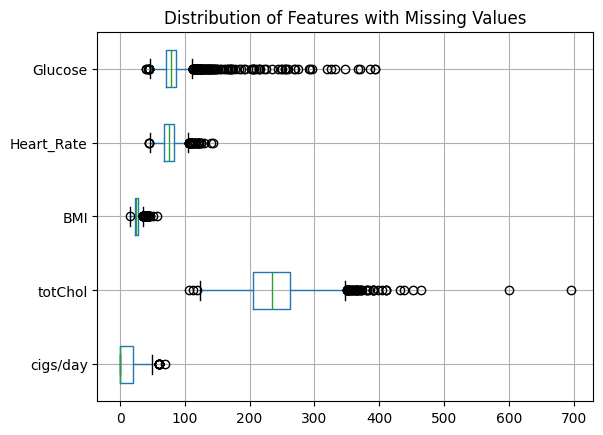

In [129]:
# Inspect the numerical features missing values

features_missing_values = ['cigs/day', 'totChol', 'BMI', 'Heart_Rate', 'Glucose']
print("Missing Values:")
for col in features_missing_values:
    pc = round(chd_df[col].isnull().sum() / chd_df.shape[0] * 100, 2)
    print(f"{col}: {pc}%")

fig, ax = subplots()

chd_df[['cigs/day', 'totChol', 'BMI', 'Heart_Rate', 'Glucose']].boxplot(vert=False)
ax.set_title('Distribution of Features with Missing Values');

The percentages of missing values are relatively small except for 'Glucose' which accounts for almost 1/10.<br>
Outliers in medical data can be important for modelling, therefore, will impute with median.<br>
However, will clip the two extreme outliers in 'totChol'.

In [130]:
# Determine the values of the extreme outliers of 'totChol'

chd_df['totChol'].sort_values(ascending=False).head()

3160    696.0
1111    600.0
194     464.0
3474    453.0
543     439.0
Name: totChol, dtype: float64

1624    107.0
2525    113.0
4066    119.0
2443    124.0
1869    126.0
Name: totChol, dtype: float64
3160    464.0
1111    464.0
194     464.0
3474    453.0
543     439.0
Name: totChol, dtype: float64


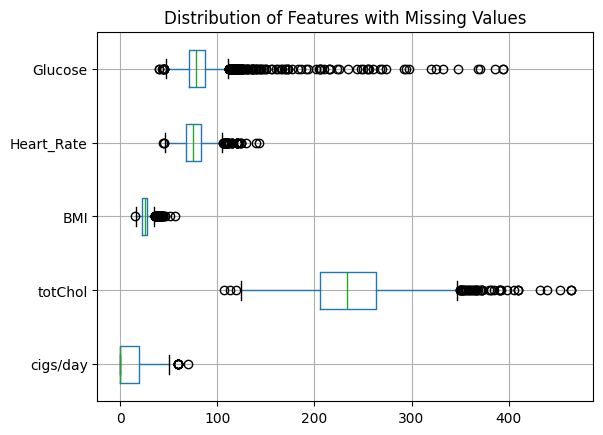

In [131]:
# Clip 'totChol' (107-464) to reassign the two extreme outliers 600 & 696 to 464

chd_df['totChol'] = clip(chd_df['totChol'], chd_df['totChol'].min(), 464.0)

# Check outcome of clipping
print(chd_df['totChol'].sort_values().head())
print(chd_df['totChol'].sort_values(ascending=False).head())

fig, ax = subplots()

chd_df[['cigs/day', 'totChol', 'BMI', 'Heart_Rate', 'Glucose']].boxplot(vert=False)
ax.set_title('Distribution of Features with Missing Values');

In [132]:
# Impute with median

chd_df['cigs/day'] = chd_df['cigs/day'].fillna(chd_df['cigs/day'].median())
chd_df['totChol'] = chd_df['totChol'].fillna(chd_df['totChol'].median())
chd_df['BMI'] = chd_df['BMI'].fillna(chd_df['BMI'].median())
chd_df['Heart_Rate'] = chd_df['Heart_Rate'].fillna(chd_df['Heart_Rate'].median())
chd_df['Glucose'] = chd_df['Glucose'].fillna(chd_df['Glucose'].median())

Sex             0
Age             0
Education       0
Smoker          0
cigs/day        0
BP_meds         0
Stroke          0
Hypertension    0
Diabetes        0
totChol         0
sysBP           0
diaBP           0
BMI             0
Heart_Rate      0
Glucose         0
TenYearCHD      0
dtype: int64


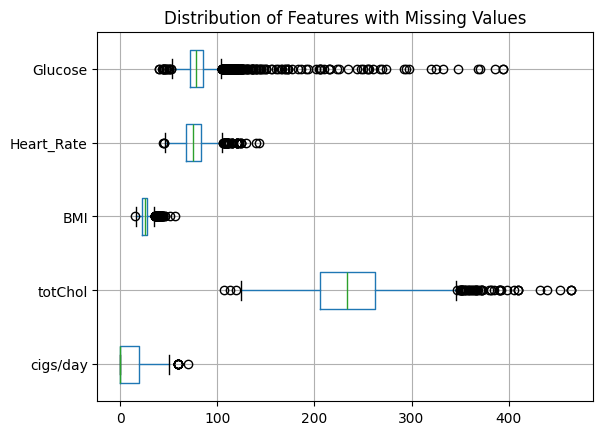

In [133]:
# Check outcome of imputation

print(chd_df.isnull().sum())

fig, ax = subplots()

chd_df[['cigs/day', 'totChol', 'BMI', 'Heart_Rate', 'Glucose']].boxplot(vert=False)
ax.set_title('Distribution of Features with Missing Values');

# Inspect TenYearCHD

2
[0 1]


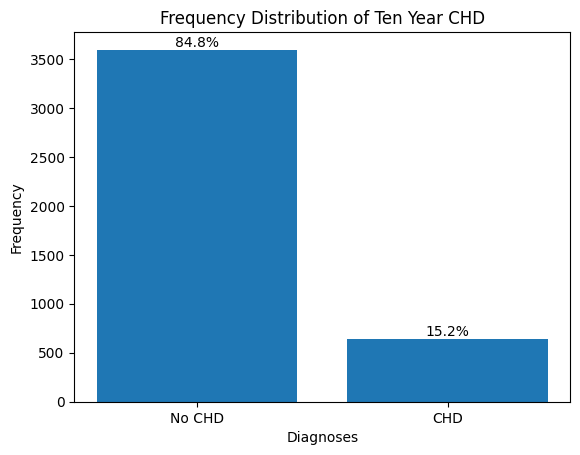

In [134]:
# Inspect TenYearCHD

y_df = chd_df['TenYearCHD']
print(y_df.nunique())
print(y_df.unique())

y_df_count = y_df.value_counts().to_list()
# print(y_df_count)

y_df_pc = round(y_df.value_counts(normalize=True)*100, 1).to_list()
y_df_pc_str = [str(i)+'%' for i in y_df_pc]
# print(y_df_pc_str)

x_labels = ['No CHD', 'CHD']

fig, ax = subplots()

bar_container = ax.bar(x_labels, y_df_count)  # Specify x-labels and their y-values
ax.bar_label(bar_container, labels=y_df_pc_str)
ax.set_xlabel('Diagnoses')

ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Ten Year CHD');

The target categories are imbalanced. Given this is medical data, will resist the urge to rebalance by over/undersampling.

In [135]:
chd_df.groupby('TenYearCHD').describe()

Sex                                                  Age  \
             count      mean       std  min  25%  50%  75%  max   count   
TenYearCHD                                                                
0           3594.0  0.410684  0.492027  0.0  0.0  0.0  1.0  1.0  3594.0   
1            644.0  0.532609  0.499323  0.0  0.0  1.0  1.0  1.0   644.0   

                                                              Education  \
                 mean       std   min   25%   50%   75%   max     count   
TenYearCHD                                                                
0           48.767668  8.413457  32.0  42.0  48.0  55.0  70.0    3594.0   
1           54.145963  8.005663  35.0  48.0  55.0  61.0  70.0     644.0   

                                                         Smoker            \
                mean       std  min  25%  50%  75%  max   count      mean   
TenYearCHD                                                                  
0           1.977462  1.014119  1.0  1.0  2.0  3.0  4.0  3594.0  0.489983   
1           1.827640  1.034301  1.0  1.0  1.0  2.0  4.0   644.0  0.517081   

                                              cigs/day                        \
                 std  min  25%  50%  75%  max    count       mean        std   
TenYearCHD                                                                     
0           0.499969  0.0  0.0  0.0  1.0  1.0   3594.0   8.644964  11.672054   
1           0.500097  0.0  0.0  1.0  1.0  1.0    644.0  10.596273  12.999882   

                                      BP_meds                                \
            min  25%  50%   75%   max   count      mean       std  min  25%   
TenYearCHD                                                                    
0           0.0  0.0  0.0  20.0  70.0  3594.0  0.023094  0.150223  0.0  0.0   
1           0.0  0.0  2.0  20.0  60.0   644.0  0.063665  0.244344  0.0  0.0   

                           Stroke                                          \
            50%  75%  max   count      mean       std  min  25%  50%  75%   
TenYearCHD                                                                  
0           0.0  0.0  1.0  3594.0  0.003895  0.062300  0.0  0.0  0.0  0.0   
1           0.0  0.0  1.0   644.0  0.017081  0.129673  0.0  0.0  0.0  0.0   

                Hypertension                                               \
            max        count      mean       std  min  25%  50%  75%  max   
TenYearCHD                                                                  
0           1.0       3594.0  0.275737  0.446947  0.0  0.0  0.0  1.0  1.0   
1           1.0        644.0  0.504658  0.500367  0.0  0.0  1.0  1.0  1.0   

           Diabetes                                              totChol  \
              count      mean       std  min  25%  50%  75%  max   count   
TenYearCHD                                                                 
0            3594.0  0.019199  0.137242  0.0  0.0  0.0  0.0  1.0  3594.0   
1             644.0  0.062112  0.241546  0.0  0.0  0.0  0.0  1.0   644.0   

                                                                       sysBP  \
                  mean        std    min    25%    50%    75%    max   count   
TenYearCHD                                                                     
0           235.094602  43.000016  113.0  205.0  233.0  261.0  464.0  3594.0   
1           245.018634  46.468903  107.0  214.0  240.5  271.0  464.0   644.0   

                                                                      diaBP  \
                  mean        std   min    25%    50%    75%    max   count   
TenYearCHD                                                                    
0           130.333612  20.455232  83.5  116.0  127.0  141.0  243.0  3594.0   
1           143.618789  26.690282  83.5  125.0  139.0  158.0  295.0   644.0   

                                                                    BMI  \
                 mean        std   min   25%   50%   75

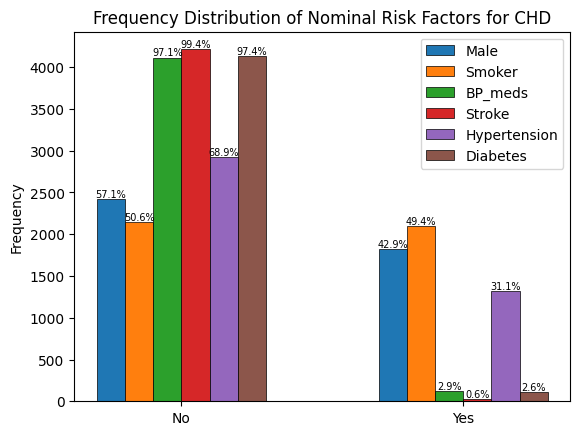

In [136]:
# Nominal (0, 1) features

sex_count = chd_df['Sex'].value_counts().to_list()  # list of counts of 0s & 1s
sex_pc = round(chd_df['Sex'].value_counts(normalize=True)*100, 1).to_list()  # List of percentages of 0s & 1s 
sex_pc_str = [str(i)+'%' for i in sex_pc]  # Convert percentages to str and concatenate '%'

smoker_count = chd_df['Smoker'].value_counts().to_list()
smoker_pc = round(chd_df['Smoker'].value_counts(normalize=True)*100, 1).to_list()
smoker_pc_str = [str(i)+'%' for i in smoker_pc]

bp_meds_count = chd_df['BP_meds'].value_counts().to_list()
bp_meds_pc = round(chd_df['BP_meds'].value_counts(normalize=True)*100, 1).to_list()
bp_meds_pc_str = [str(i)+'%' for i in bp_meds_pc]

stroke_count = chd_df['Stroke'].value_counts().to_list()
stroke_pc = round(chd_df['Stroke'].value_counts(normalize=True)*100, 1).to_list()
stroke_pc_str = [str(i)+'%' for i in stroke_pc]

hypertension_count = chd_df['Hypertension'].value_counts().to_list()
hypertension_pc = round(chd_df['Hypertension'].value_counts(normalize=True)*100, 1).to_list()
hypertension_pc_str = [str(i)+'%' for i in hypertension_pc]

diabetes_count = chd_df['Diabetes'].value_counts().to_list()
diabetes_pc = round(chd_df['Diabetes'].value_counts(normalize=True)*100, 1).to_list()
diabetes_pc_str = [str(i)+'%' for i in diabetes_pc]

x = arange(2)  # Number of xticks
bar_width = 0.1
x_labels = ['No', 'Yes']  # x-axis labels

fig, ax = subplots()

sex_bar_con = ax.bar(x=x-2.5*bar_width, height=sex_count, width=bar_width, edgecolor='k', linewidth=0.5)  # Create a bar container to display bar labels
ax.bar_label(sex_bar_con, sex_pc_str, fontsize=7)  # Display percentage on top of bar
smoker_bar_con = ax.bar(x=x-1.5*bar_width, height=smoker_count, width=bar_width, edgecolor='k', linewidth=0.5)
ax.bar_label(smoker_bar_con, smoker_pc_str, fontsize=7)
bp_meds_bar_con = ax.bar(x=x-bar_width/2, height=bp_meds_count, width=bar_width, edgecolor='k', linewidth=0.5)
ax.bar_label(bp_meds_bar_con, bp_meds_pc_str, fontsize=7)
stroke_bar_con = ax.bar(x=x+bar_width/2, height=stroke_count, width=bar_width, edgecolor='k', linewidth=0.5)
ax.bar_label(stroke_bar_con, stroke_pc_str, fontsize=7)
hypertension_bar_con = ax.bar(x=x+1.5*bar_width, height=hypertension_count, width=bar_width, edgecolor='k', linewidth=0.5)
ax.bar_label(hypertension_bar_con, hypertension_pc_str, fontsize=7)
diabetes_bar_con = ax.bar(x=x+2.5*bar_width, height=diabetes_count, width=bar_width, edgecolor='k', linewidth=0.5)
ax.bar_label(diabetes_bar_con, diabetes_pc_str, fontsize=7)

ax.set_xticks(x, ['No', 'Yes'])
# ax.set_xlabel('')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Nominal Risk Factors for CHD')
ax.legend(['Male', 'Smoker', 'BP_meds', 'Stroke', 'Hypertension', 'Diabetes']);

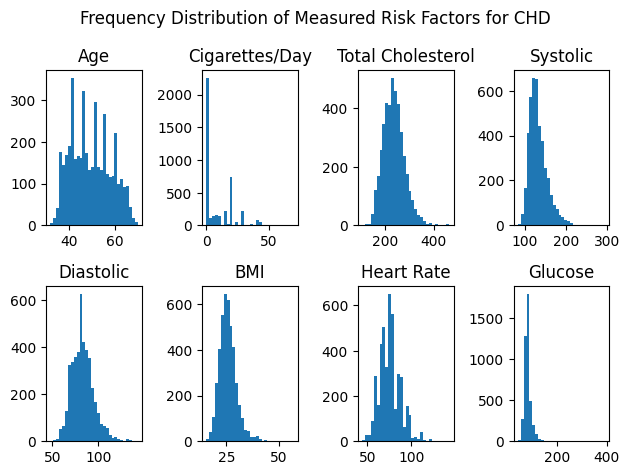

In [137]:
# Numerical data analysis

# chd_df.hist(bins=30, figsize=(10,10));

n_rows = 2
n_cols = 4
n_bins = 30

fig, ax = subplots(nrows=n_rows, ncols=n_cols)

ax[0,0].hist(chd_df['Age'], bins=n_bins)
ax[0,0].set_title('Age')

ax[0,1].hist(chd_df['cigs/day'], bins=n_bins)
ax[0,1].set_title('Cigarettes/Day')

ax[0,2].hist(chd_df['totChol'], bins=n_bins)
ax[0,2].set_title('Total Cholesterol')

ax[0,3].hist(chd_df['sysBP'], bins=n_bins)
ax[0,3].set_title('Systolic')

ax[1,0].hist(chd_df['diaBP'], bins=n_bins)
ax[1,0].set_title('Diastolic')

ax[1,1].hist(chd_df['BMI'], bins=n_bins)
ax[1,1].set_title('BMI')

ax[1,2].hist(chd_df['Heart_Rate'], bins=n_bins)
ax[1,2].set_title('Heart Rate')

ax[1,3].hist(chd_df['Glucose'], bins=n_bins)
ax[1,3].set_title('Glucose')

fig.suptitle('Frequency Distribution of Measured Risk Factors for CHD')
fig.tight_layout()

Pearson Correlation

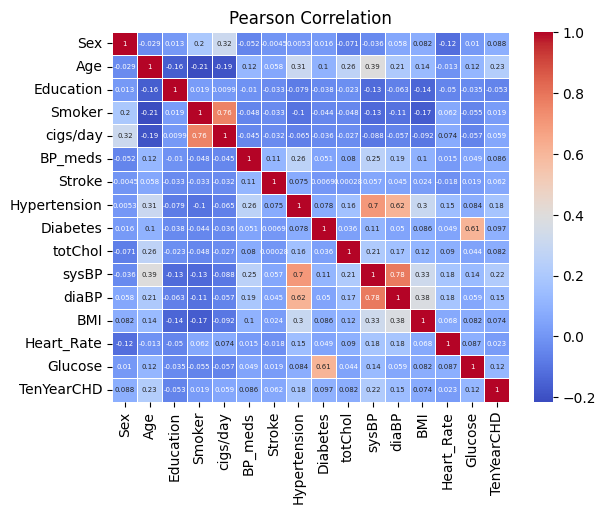

In [138]:
pc_mat = chd_df.corr(method='pearson', numeric_only=True)

fig, ax = subplots()

heatmap(pc_mat, annot=True, annot_kws={'fontsize':5}, linewidths=0.5, cmap='coolwarm')
ax.set_title('Pearson Correlation');

Multicolinearity may present issues for logistic regression. There maybe a few features that are correlated (_e.g._, `Smoker` / `cigs/day`  and `Hypertension` / `sysBP` / `diaBP`).

Let's explore how some features correlate

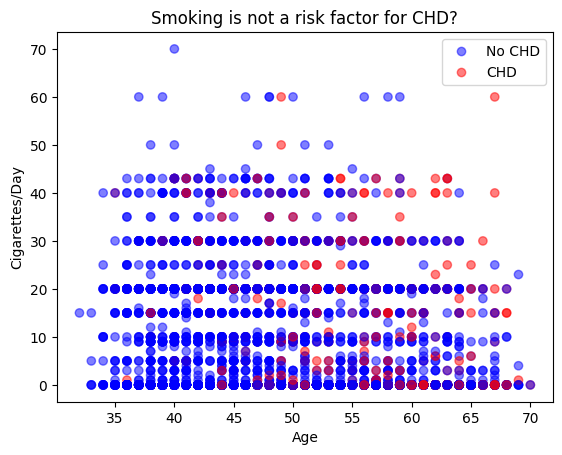

In [139]:
fig, ax = subplots()

diagnoses = ['No CHD', 'CHD']

scatter_con = ax.scatter(chd_df['Age'], chd_df['cigs/day'], c=chd_df['TenYearCHD'], cmap='bwr', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Cigarettes/Day')
ax.set_title('Smoking is not a risk factor for CHD?')
ax.legend(handles=scatter_con.legend_elements()[0], labels=diagnoses);

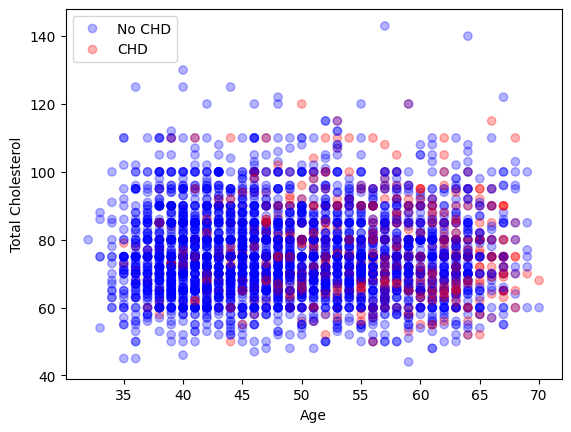

In [140]:
fig, ax = subplots()

diagnoses = ['No CHD', 'CHD']

scatter_con = ax.scatter(chd_df['Age'], chd_df['Heart_Rate'], c=chd_df['TenYearCHD'], cmap='bwr', alpha=0.3)
ax.set_xlabel('Age')
ax.set_ylabel('Total Cholesterol')
ax.set_title('')
ax.legend(handles=scatter_con.legend_elements()[0], labels=diagnoses);

# Define X & y datasets

In [141]:
X_df = chd_df.drop('TenYearCHD', axis=1)
X = X_df.to_numpy()
print(X.shape)

y_df = chd_df['TenYearCHD']
y = y_df.to_numpy()
y.shape

(4238, 15)


(4238,)

# Split data

In [142]:
# Train_test_split

RS = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RS)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3390, 15) (848, 15) (3390,) (848,)


# Scale

In [143]:
rob_scl = RobustScaler()  # Robust to outliers

X_train_scl = rob_scl.fit_transform(X_train)
print(X_train_scl)

X_test_scl = rob_scl.transform(X_test)
X_test_scl

[[ 1.          0.85714286 -0.5        ...  1.0804829  -0.66666667
  -0.25      ]
 [ 0.          0.35714286  0.         ... -0.38631791  1.13333333
   0.08333333]
 [ 1.         -0.35714286 -0.5        ... -0.79678068  0.
   1.66666667]
 ...
 [ 0.         -0.5         0.         ...  0.91348089  0.
  -0.25      ]
 [ 1.         -0.14285714  1.         ...  0.87122736 -0.8
  -0.75      ]
 [ 0.         -0.57142857 -0.5        ...  1.83903421 -0.2
   0.5       ]]


array([[ 1.        ,  0.14285714,  1.        , ...,  1.00402414,
         0.66666667,  0.25      ],
       [ 1.        , -0.71428571, -0.5       , ...,  0.59356137,
         0.        ,  1.33333333],
       [ 1.        , -0.21428571, -0.5       , ...,  1.05030181,
         1.66666667, -0.25      ],
       ...,
       [ 1.        , -0.21428571, -0.5       , ..., -1.4889336 ,
         0.2       ,  0.        ],
       [ 1.        ,  1.14285714,  1.        , ...,  0.74044266,
         0.46666667,  0.83333333],
       [ 1.        , -1.07142857,  0.5       , ..., -0.38028169,
         0.66666667, -1.08333333]], shape=(848, 15))

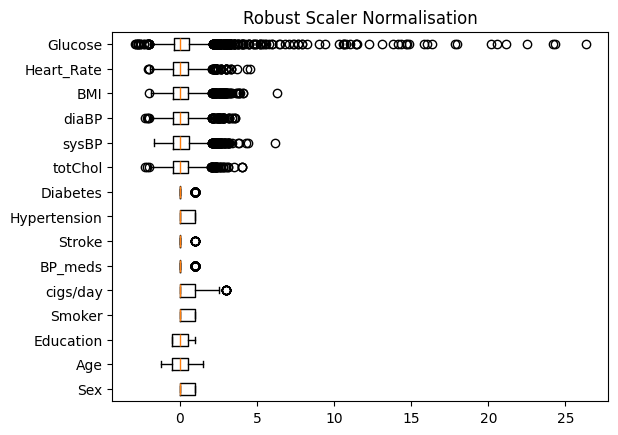

In [144]:
# Inspect scaled data

fig, ax = subplots()

ax.boxplot(X_train_scl, vert=False, tick_labels=X_df.columns)
ax.set_title('Robust Scaler Normalisation');


# Logistic Regression

In [145]:
log_reg = LogisticRegression(random_state=RS, n_jobs=-1)

log_reg.fit(X_train_scl, y_train)

LogisticRegression(n_jobs=-1, random_state=123)

In [159]:
# Predict and get the prediction probabilities

y_pred_log_reg = log_reg.predict(X_test_scl)
probs_log_reg = log_reg.predict_proba(X_test_scl)
# probs_log_reg = (log_reg.predict_proba(X_test_scl[:, 0] >= 0.7).reshape(-1,1)).astype(int)  # Try to change the threshold from default=0.5
# print(probs)

y_pred_df = DataFrame(y_pred_log_reg)  # Convert np array to pandas df
# print(y_pred_df.value_counts())

y_test_df = DataFrame(y_test)  # Convert np array to pandas df
# print(y_test_df.value_counts())

log_reg_result_df = DataFrame({'0-Prob': probs_log_reg[:, 0], '1-Prob': probs_log_reg[:, 1], 'Predicted': y_pred_log_reg, 'Actual': y_test})
print(log_reg_result_df['Predicted'].value_counts())
print(log_reg_result_df['Actual'].value_counts())
log_reg_result_df.sample(20)


Predicted
0    826
1     22
Name: count, dtype: int64
Actual
0    708
1    140
Name: count, dtype: int64


,0-Prob,1-Prob,Predicted,Actual
81,0.395281,0.604719,1,0
666,0.916723,0.083277,0,0
168,0.900194,0.099806,0,0
766,0.738251,0.261749,0,0
558,0.923314,0.076686,0,0
319,0.964018,0.035982,0,0
135,0.699061,0.300939,0,0
250,0.852081,0.147919,0,1
786,0.942405,0.057595,0,1
688,0.889931,0.110069,0,0


In [147]:
# Metrics

acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(acc_log_reg)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_log_reg

0.839622641509434


array([[699,   9],
       [127,  13]])

In [148]:
# Plot Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=True, ax=None):
    """
    This function prints/plots the confusion matrix (adapted from a SciKit-Learn example)

    y_true: Actual class labels (array)
    y_pred: Predicted class labels (array)
    classes: Class names (str, array)
    normalize: Normalize the results (True), or show as integer values (False)
    ax: Visualization axis
    """

    from itertools import product
    from numpy import asarray, newaxis
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    n_classes = len(classes)

    if normalize:
        cm = asarray(cm).astype('float32') /cm.sum(axis=1)[:, newaxis]

    if not ax:
        from matplotlib.pyplot import subplots, show
        fig, ax = subplots()

    ticks = range(n_classes)
    ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_xticks(ticks)
    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticks(ticks)
    ax.set_yticklabels(classes)
    fmt = '.2f' if normalize else 'd'
    thresh = 3*cm.max() / 4
    cm_dim = cm.shape

    # Matrix indices:
    indices_a = range(cm_dim[0])
    indices_b = range(cm_dim[1])
    # Cartesian product of matrix indices:
    indices = product(indices_a, indices_b)
    fmt = '.3f' if normalize else 'd'

    for ind_a, ind_b in indices:
      label = format(cm[ind_a, ind_b], fmt)
      color = "white" if cm[ind_a, ind_b] > thresh else "black"
      ax.text(ind_b, ind_a, label, ha="center", color=color)
    ax.set_ylabel('True Labels')
    ax.set_xlabel('Predicted Labels')

    return ax

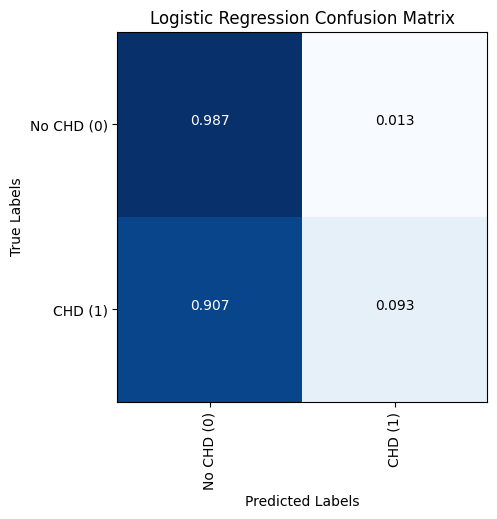

In [149]:
class_names = ('No CHD (0)', 'CHD (1)')

fig, ax = subplots()
plot_confusion_matrix(y_test, y_pred_log_reg, classes=class_names, normalize=True, ax=ax)
ax.set_title('Logistic Regression Confusion Matrix', fontsize=12);


In [150]:
# Poor true positive rate

recall_log_reg = recall_score(y_test, y_pred_log_reg)
recall_log_reg

0.09285714285714286

# Hyperparameter Tuning<br>
Probably not worth doing for the small gain in accuracy/recall (if any).

In [151]:
# Adapted from: https://www.geeksforgeeks.org/machine-learning/how-to-optimize-logistic-regression-performance/
#               https://dev.to/lokesh-g/performance-optimization-in-logistic-regression-using-parameter-tuning-4g05
#               https://codesignal.com/learn/courses/intro-to-model-optimization-in-machine-learning/lessons/hyperparameter-tuning-in-logistic-regressions

# Create a parameter grid for hyperparameter tuning the Logistic Regression model

param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1.0, 10.0],
    # 'C': logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    # 'max_iter': [100, 1000]
    'max_iter': [100, 1000, 2500, 5000]
}]

In [152]:
# Use GridSearchCV to get optimal combination of hyperparameters

gscv = GridSearchCV(log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gscv

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0],
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}],
             verbose=1)

In [153]:
# Apply optimal hyperparameters to Logostic Regression model

gscv.fit(X_train_scl, y_train)
optimal_lr = gscv.best_estimator_
optimal_params = gscv.best_params_


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Python says NO!<br>
Convergence Warning!


In [154]:
y_pred_opt = optimal_lr.predict(X_test_scl)
# y_pred_opt

In [155]:
acc_opt_lr = accuracy_score(y_test, y_pred_opt)
acc_opt_lr

0.8408018867924528

No apparent model improvement. Accuracy score after hyperparameter tuning = 84.0%, it was 84.0%.

# Naïve Bayes

In [156]:
nb_g = GaussianNB()
# nb_g = BernoulliNB()

nb_g.fit(X_train_scl, y_train)

y_pred_nb_g = nb_g.predict(X_test_scl)

probs_nb_g = nb_g.predict_proba(X_test_scl)
print(probs_nb_g)

acc_nb_g = accuracy_score(y_test, y_pred_nb_g)
acc_nb_g

[[9.77863314e-01 2.21366861e-02]
 [9.55135928e-01 4.48640720e-02]
 [9.46464737e-01 5.35352630e-02]
 ...
 [9.97111343e-01 2.88865694e-03]
 [9.64938695e-01 3.50613049e-02]
 [9.99400958e-01 5.99042001e-04]]


0.8195754716981132

Function to plot decision boundaries of ML models

In [157]:
# https://bsc-iitm.github.io/MLT_notes/pages/Not08.html

def plot_decision_boundary(model, X, y):
    from numpy import meshgrid, arange, c_, unique
    # Define the range of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    # Generate a grid of points
    xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))

    # Predict the class for each point in the grid
    Z = model.predict(c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a contour plot
    ax.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training data points
    markers = ['o', 'x', 's', '^', 'v']  # markers for each class
    colors = ['r', 'g']
    for i, class_label in enumerate(unique(y)):
        ax.scatter(X[y == class_label, 0], X[y == class_label, 1], marker=markers[i], label=class_label, c=colors[i])

    ax.xlabel('Feature 1')
    ax.ylabel('Feature 2')
    ax.title('Decision Boundary')
    ax.legend()
    ax.show()